In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\FraudDetectionData.csv")

In [3]:
# Change the data type of column 'A' from float64 to float32
df['amount'] = df['amount'].astype('float32')
df['oldbalanceOrg'] = df['oldbalanceOrg'].astype('float32')
df['oldbalanceDest'] = df['oldbalanceDest'].astype('float32')
df['newbalanceOrig'] = df['newbalanceOrig'].astype('float32')
df['newbalanceDest'] = df['newbalanceDest'].astype('float32')

In [5]:
df['step'] = df['step'].astype('int32')
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype('int32') 
df['isFraud'] = df['isFraud'].astype('int32') 

In [6]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['type'])
# printing label
label
# removing the column 'type' from df
# as it is of no use now.
df.drop("type", axis=1, inplace=True)
# Appending the array to our dataFrame
# with column name 'type'
df["type"] = label
# printing Dataframe
#df

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameDest'])
label
df.drop("nameDest", axis=1, inplace=True)
df["nameDest"] = label
#df

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameOrig'])
label
df.drop("nameOrig", axis=1, inplace=True)
df["nameOrig"] = label
#df

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('isFraud', axis=1)
# Separate the target variable
y = df['isFraud']

# Print class distribution before split
print(y.value_counts(normalize=True))

from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=18)

# Print class distribution after split
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.998709
1    0.001291
Name: isFraud, dtype: float64
0    0.998709
1    0.001291
Name: isFraud, dtype: float64
0    0.99871
1    0.00129
Name: isFraud, dtype: float64


In [11]:
print("Number of rows in X_train:", X_train.shape[0])
print("Number of rows in X_test:", X_test.shape[0])

Number of rows in X_train: 5726358
Number of rows in X_test: 636262


In [12]:
import random
random.seed (20)
import numpy as np
from scipy import stats

# Specify columns with outliers
cols_with_outliers = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Specify the number of bootstrapped samples to create per column
num_samples = 50

# Specify the right trimming proportions for each column
trim_props = {'amount': 0.14, 'oldbalanceOrg': 0.24, 'newbalanceOrig': 0.25, 'oldbalanceDest': 0.22, 'newbalanceDest': 0.22}

# Initialize empty dictionaries to store the trimmed means for each column
train_trimmed_means = {}

# Loop over the specified columns
for col_name in cols_with_outliers:
    
    # Check if the trimming proportion for this column is 0
    if trim_props[col_name] == 0:
        # If so, skip this column and move on to the next one
        continue
    
    # Initialize empty lists to store the bootstrapped samples and the trimmed means for the training set
    train_bootstrapped_samples = []
    train_trimmed_means_list = []
    
    # Loop over the number of desired samples
    for i in range(num_samples):
        # Randomly select indices from the column in the training set
        train_sample_indices = np.random.choice(X_train.index, size=len(X_train), replace=True)
        
        # Create a bootstrapped sample by indexing into the column with the selected indices for the training set
        train_sample = X_train.loc[train_sample_indices, col_name]
        
        # Append the bootstrapped samples to the list for the training set
        train_bootstrapped_samples.append(train_sample)
        
        # Calculate the right trimmed mean of the bootstrapped sample for the training set
        train_right_trimmed_mean = np.mean(train_sample[train_sample <= np.percentile(train_sample, 100*(1-trim_props[col_name]))])
        train_trimmed_means_list.append(train_right_trimmed_mean)
        
    # Calculate the mean of the right trimmed means for the training set and add it to the dictionary
    train_trimmed_means[col_name] = np.mean(train_trimmed_means_list)

    # Replace the outliers in the training set with the trimmed means
    X_train.loc[X_train[col_name] > np.percentile(X_train[col_name], 100*(1-trim_props[col_name])), col_name] = train_trimmed_means[col_name]

# Print the trimmed means for each column separately for the training set
print("Train set trimmed means: ", train_trimmed_means)

Train set trimmed means:  {'amount': 84271.94, 'oldbalanceOrg': 17621.898, 'newbalanceOrig': 12169.728, 'oldbalanceDest': 191011.05, 'newbalanceDest': 245126.7}


In [13]:
# # Convert float64 columns to float32
# float64_cols = df.select_dtypes(include=['float64']).columns
# df[float64_cols] = df[float64_cols].astype('float32')

## FS Random Forest

In [30]:
# from sklearn.ensemble import RandomForestClassifier
# # Select top features using Random Forest
# rf = RandomForestClassifier(random_state=18)
# rf.fit(X_train, y_train)
# importances = rf.feature_importances_
# indices = np.argsort(importances)[::-1]
# top_features = X_train.columns[indices][:5]  # select top 5 features
# print(top_features )

In [15]:
# import matplotlib.pyplot as plt
# # Plot feature importances
# plt.figure(figsize=(7, 5))
# plt.title("Feature importances")
# plt.bar(range(len(indices)), importances[indices])
# plt.xticks(range(len(indices)), X_train.columns[indices], rotation=90)
# plt.tight_layout()
# plt.show()

In [16]:
# # Subset X_train to include only selected features
# X_train_selected = X_train[top_features]

In [17]:
# index_of_b = df.columns.get_loc('newbalanceDest')
# print(index_of_b) 

5


In [18]:
# index_of_b = df.columns.get_loc('step')
# print(index_of_b) 

0


In [19]:
# index_of_b = df.columns.get_loc('oldbalanceOrg')
# print(index_of_b) 

2


In [21]:
# index_of_b = df.columns.get_loc('oldbalanceDest')
# print(index_of_b) 

4


In [20]:
# index_of_b = df.columns.get_loc('amount')
# print(index_of_b) 

1


In [22]:
# #Extract same features in test set,select the columns by index
# selected_indices = [5,0,2,4,1]
# X_test_selected = X_test.iloc[:, selected_indices]

In [23]:
print(X_test_selected.shape)

(636262, 5)


In [24]:
print(y_train.shape)

(5726358,)


## Always use

In [31]:
# Assuming your original training data is stored in a pandas DataFrame called X_train
# And assuming you have a list of selected feature names called selected_features
selected_features = ['newbalanceDest', 'step', 'oldbalanceDest','oldbalanceOrg','amount']
X_train_selected = X_train[selected_features]

In [32]:
X_train_selected 

,newbalanceDest,step,oldbalanceDest,oldbalanceOrg,amount
5289717,6.115774e+05,373,306416.250000,3296.000000,305161.156250
5962343,0.000000e+00,406,0.000000,0.000000,8840.879883
2527894,0.000000e+00,205,0.000000,10548.000000,3120.010010
4081906,1.050114e+06,301,704466.875000,0.000000,84271.937500
5004020,2.451267e+05,353,191011.046875,0.000000,84271.937500
...,...,...,...,...,...
3873820,1.335741e+05,283,136055.593750,29907.000000,2481.469971
713223,2.451267e+05,37,191011.046875,231.000000,7665.970215
4991147,2.451267e+05,352,191011.046875,29582.000000,29435.640625
6279815,2.451267e+05,644,191011.046875,17621.898438,84271.937500


In [33]:
#Extract same features in test set,select the columns by index
selected_indices = [5,0,4,2,1]
X_test_selected = X_test.iloc[:, selected_indices]

In [34]:
X_test_selected

,newbalanceDest,step,oldbalanceDest,oldbalanceOrg,amount
1402687,3.239300e+05,139,5.000470e+05,2.080000e+03,176116.968750
2760752,9.766837e+04,213,6.575366e+05,5.854688e+06,559868.187500
3594236,0.000000e+00,262,0.000000e+00,2.745168e+05,8622.099609
1933631,0.000000e+00,177,0.000000e+00,7.080094e+04,30724.619141
2227203,4.123296e+06,186,3.308022e+06,0.000000e+00,815273.687500
...,...,...,...,...,...
3753638,0.000000e+00,279,0.000000e+00,0.000000e+00,1305.969971
1532557,0.000000e+00,154,0.000000e+00,1.235073e+06,26853.359375
2800777,0.000000e+00,217,0.000000e+00,1.291580e+04,28641.919922
2444235,0.000000e+00,203,0.000000e+00,2.710670e+05,10589.280273


## Early stopping

In [35]:
from scipy.stats import randint as sp_randint
# Define your hyperparameter search space
param_dist = { 
    'n_estimators': sp_randint(100, 300),
    'max_features': ['sqrt', 'log2'],
    'max_depth' : sp_randint(3,5),
    'criterion' :['gini', 'entropy']
}

In [36]:
from sklearn.experimental import enable_halving_search_cv  # Required to enable HalvingRandomSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

# Set up the HalvingRandomSearchCV with aggressive early stopping
search = HalvingRandomSearchCV(rf, param_dist, cv=5,verbose=1, 
                               factor=2, resource='n_samples', max_resources=100, 
                               aggressive_elimination=True, random_state=18, 
                               scoring='accuracy', refit=True)

# Fit the HalvingRandomSearchCV object to the data
search.fit(X_train_selected, y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 20
max_resources_: 100
aggressive_elimination: True
factor: 2
----------
iter: 0
n_candidates: 5
n_resources: 20
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 1
n_candidates: 3
n_resources: 40
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 2
n_candidates: 2
n_resources: 80
Fitting 5 folds for each of 2 candidates, totalling 10 fits


HalvingRandomSearchCV(aggressive_elimination=True,
                      estimator=RandomForestClassifier(random_state=18),
                      factor=2, max_resources=100,
                      param_distributions={'criterion': ['gini', 'entropy'],
                                           'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020544E947C8>,
                                           'max_features': ['sqrt', 'log2'],
                                           'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020544E94A88>},
                      random_state=18, scoring='accuracy', verbose=1)

In [37]:
# Get the best hyperparameters and evaluate on the test set
best_params = search.best_params_
best_model = search.best_estimator_

In [38]:
y_pred = best_model.predict(X_test_selected)

In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Best hyperparameters:", best_params)
print("Test set accuracy:", accuracy)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 290}
Test set accuracy: 0.9987112227352883


## Use cost sensitive learning random forest with the hyperparameters

In [40]:
print(X_train_selected.shape)

(5726358, 5)


In [41]:
print(y_train.shape)

(5726358,)


Fold: 1
Confusion matrix:
 [[994425 911897]
 [     7   2457]]
Recall: 0.9971590909090909
Accuracy: 0.5222596980489169
Precision: 0.0026871430540031543
F1-score: 0.005359842411470979
AUC-ROC: 0.9553666984894091
---------------------


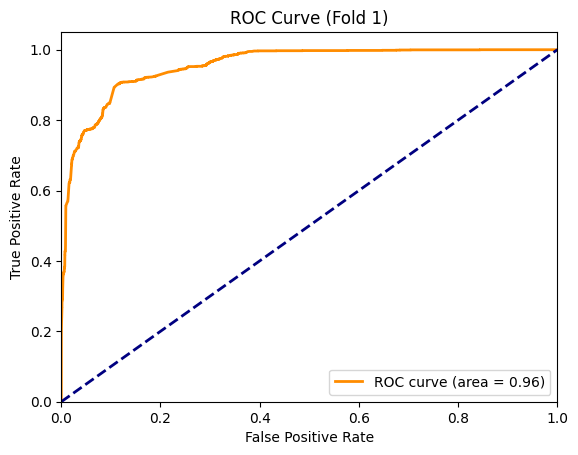

Fold: 2
Confusion matrix:
 [[995053 911269]
 [     6   2458]]
Recall: 0.997564935064935
Accuracy: 0.5225892268698534
Precision: 0.002690081391925597
F1-score: 0.00536569339799234
AUC-ROC: 0.9547708016865263
---------------------


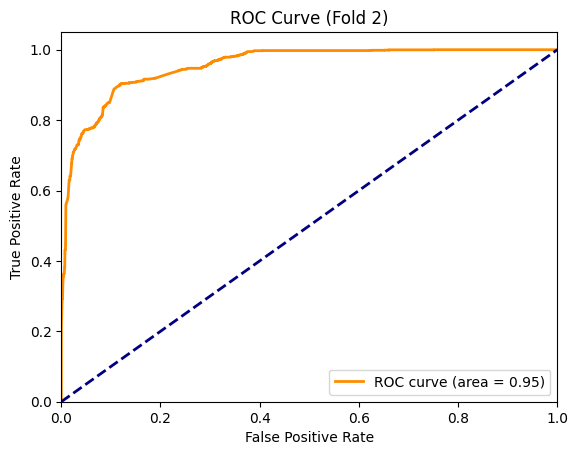

Fold: 3


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score

# Define the number of splits for stratified cross-validation
n_splits = 3

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits)

# Create lists to store evaluation metrics for each fold
f1_scores = []
recall_scores = []
precision_scores = []
accuracy_scores = []
roc_auc_scores = []

# Iterate over each fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_selected, y_train)):
    print(f'Fold: {fold+1}')
    
    # Split the data into training and validation sets
#     X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
#     X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    X_fold_train, y_fold_train = X_train_selected.iloc[train_idx], y_train.iloc[train_idx]
    X_val, y_val = X_train_selected.iloc[val_idx], y_train.iloc[val_idx]

    # Train a random forest model with 100 trees and a max depth of 4
    #6355400/8213
    class_weight = {0: 1, 1: 5000}
    rf_model = RandomForestClassifier(n_estimators=290, max_features='log2', max_depth=4,
                                   class_weight=class_weight, oob_score=True, random_state=18, criterion="entropy")

    # Fit the model on the training data
    rf_model.fit(X_train_selected, y_train)

    # Predict the class labels for the validation set
    y_val_pred = rf_model.predict(X_val)

    # Compute the evaluation metrics for the current fold
    conf_mat = confusion_matrix(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    # Compute the probabilities of each class for the validation set
    y_val_prob = rf_model.predict_proba(X_val)[:, 1]

    # Compute the false positive rate, true positive rate, and area under the ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_val_prob)
    roc_auc = auc(fpr, tpr)

    # Append the evaluation metrics for the current fold to the lists
    f1_scores.append(f1)
    recall_scores.append(recall)
    precision_scores.append(precision)
    accuracy_scores.append(accuracy)
    roc_auc_scores.append(roc_auc)

    # Print the evaluation metrics for the current fold
    print('Confusion matrix:\n', conf_mat)
    print('Recall:', recall)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('F1-score:', f1)
    print('AUC-ROC:', roc_auc)
    print('---------------------')

    # Plot the ROC curve for the current fold
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Fold %d)' % (fold+1))
    plt.legend(loc="lower right")
    plt.show()
    
# Compute the mean and standard deviation of the evaluation metrics over all the folds
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_recall

Cost sensitive learning
Use correct hyperparameter
plot OOB error for every fold
plot f1 score for train & test : https://www.bing.com/images/search?view=detailV2&ccid=7RhAWIsn&id=EFDAEB69AA4818AB3C9475F012C996C507736D0B&thid=OIP.7RhAWIsn6RONqcOdAR6t6gHaHJ&mediaurl=https%3A%2F%2Fcdn.analyticsvidhya.com%2Fwp-content%2Fuploads%2F2020%2F03%2FScreenshot-2020-03-04-at-15.08.50-850x820.png&cdnurl=https%3A%2F%2Fth.bing.com%2Fth%2Fid%2FR.ed1840588b27e9138da9c39d011eadea%3Frik%3DC21zB8WWyRLwdQ%26pid%3DImgRaw%26r%3D0&exph=820&expw=850&q=graphs+for+random+forest&simid=608001867482224477&form=IRPRST&ck=ACE74CE8E33F1BDCD8DFF63221C79789&selectedindex=9&ajaxhist=0&ajaxserp=0&vt=0&sim=11

out-of-sample testing" or "model validation.

https://www.bing.com/images/search?view=detailV2&ccid=HiBreHJ1&id=4AE90CD5515EF4A6E50E9C0688ACB5FE7C375F42&thid=OIP.HiBreHJ1b7h-1uQEgXJDfQHaFB&mediaurl=https%3A%2F%2Fmiro.medium.com%2Fmax%2F552%2F1*80OL6-Nn2oYwQPcS3aO3jg.png&exph=374&expw=552&q=graphs+for+random+forest&simid=608008151010657800&form=IRPRST&ck=18435DC859CC9886473DD5FB88D029A8&selectedindex=29&ajaxhist=0&ajaxserp=0&vt=0&sim=11&cdnurl=https%3A%2F%2Fth.bing.com%2Fth%2Fid%2FR.1e206b7872756fb87ed6e4048172437d%3Frik%3DQl83fP61rIgGnA%26pid%3DImgRaw%26r%3D0